<a href="https://colab.research.google.com/github/ankitsharma38/Machine_Learning_LABS/blob/main/Practical_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Lab_3:-Using a dataset implement SVM classifier.

Classification report for Training Evaluation using SVM
[[39  1  0]
 [ 0 30 11]
 [ 0 15 24]]
              precision    recall  f1-score   support

           0       1.00      0.97      0.99        40
           1       0.65      0.73      0.69        41
           2       0.69      0.62      0.65        39

    accuracy                           0.78       120
   macro avg       0.78      0.77      0.78       120
weighted avg       0.78      0.78      0.78       120

Classification report for Testing Evaluation using SVM
[[10  0  0]
 [ 0  7  2]
 [ 0  1 10]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.88      0.78      0.82         9
           2       0.83      0.91      0.87        11

    accuracy                           0.90        30
   macro avg       0.90      0.90      0.90        30
weighted avg       0.90      0.90      0.90        30



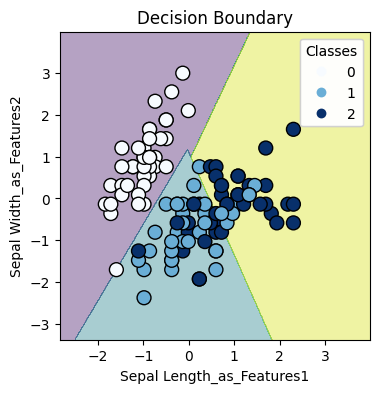

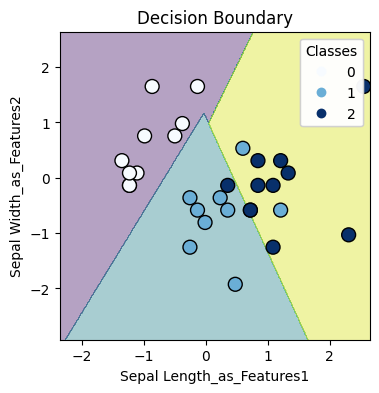

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,classification_report, accuracy_score

#load dataset from sklearn-load iris dataset
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['target'] = iris.target
iris_df.head()

X = iris.data[:, :2]
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#preprocess the features matrix using standard scaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

#create SVM Classifier
svm = SVC(kernel='linear',random_state=42) #"linear", 'poly' , 'signoid', 'rbf'

#Train the SVM Model
svm.fit(X_train, y_train)
print("Classification report for Training Evaluation using SVM")

y_pred_train = svm.predict(X_train)
cm_rf_Train = confusion_matrix(y_train, y_pred_train)
print(cm_rf_Train)
print(classification_report(y_train, y_pred_train))

print("Classification report for Testing Evaluation using SVM")
y_pred = svm.predict(X_test)
cm_rf_Test = confusion_matrix(y_test, y_pred)
print(cm_rf_Test)
print(classification_report(y_test, y_pred))

#function to plot decision boundary
def plot_decision_boundary(X, y, model, ax):
  x_min, x_max = X[:, 0].min() - 1, X[:, 1].max() + 1
  y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
  Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)
  ax.contourf(xx, yy, Z, alpha=0.4)
  scatter = ax.scatter(X[:, 0], X[:, 1], c=y, cmap='Blues', edgecolors='k', s=100)
  ax.set_title('Decision Boundary')
  legend1 = ax.legend(*scatter.legend_elements(), title="Classes")
  ax.add_artist(legend1)
  ax.set_xlabel('Sepal Length_as_Features1')
  ax.set_ylabel('Sepal Width_as_Features2')
  plt.show()

#plot decison boundary
fig, ax = plt.subplots(1,1, figsize=(4,4))
plot_decision_boundary(X_train, y_train, svm, ax)
ax.set_title('Decision Boundary for train set')
plt.show()

fig, ax = plt.subplots(1,1, figsize=(4,4))
plot_decision_boundary(X_test, y_test, svm, ax)
ax.set_title('Decision Boundary for test set')
plt.show()

